<a href="https://colab.research.google.com/github/GRACENGARI/REGRESSION-ANALYSIS/blob/main/INSURANCE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION
We will build a Linear Regression model  for medical cost insurance dataset,
The data consists of  age,sex,BMI(BODY MASS INDEX),children,smoker,region as independent features and charges as dependent features

The target outcome is the "charges",which we will try to predict based on the given features

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error


In [58]:
df =pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#DATA EXPLORATION

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
df.shape

(1338, 7)

In [61]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [62]:
df.duplicated().sum()

1

In [63]:
df = df.drop_duplicates()

In [64]:
df.duplicated().sum()

0

#EDA EXPLORATORY DATA ANALYSIS

In [65]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'Charges vs BMI')

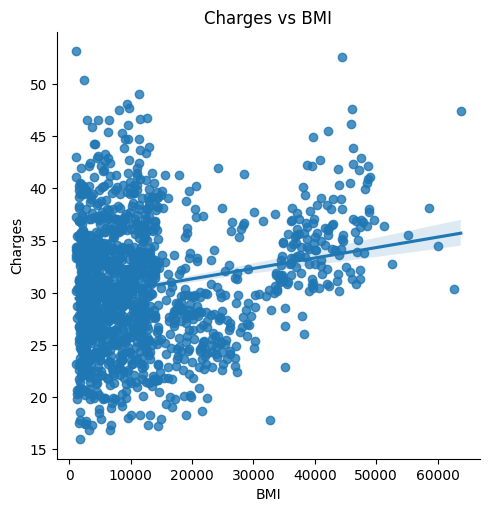

In [66]:
#BMI AND CHARGES
sns.lmplot(x ='charges',y ='bmi',data=df)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Charges vs BMI")

In [67]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4])

Text(0.5, 1.0, 'charges vs children ')

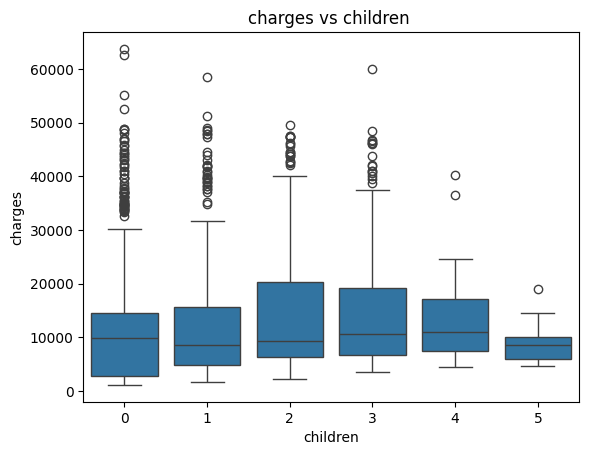

In [68]:
sns.boxplot(x="children",y="charges",data=df)
plt.title("charges vs children ")

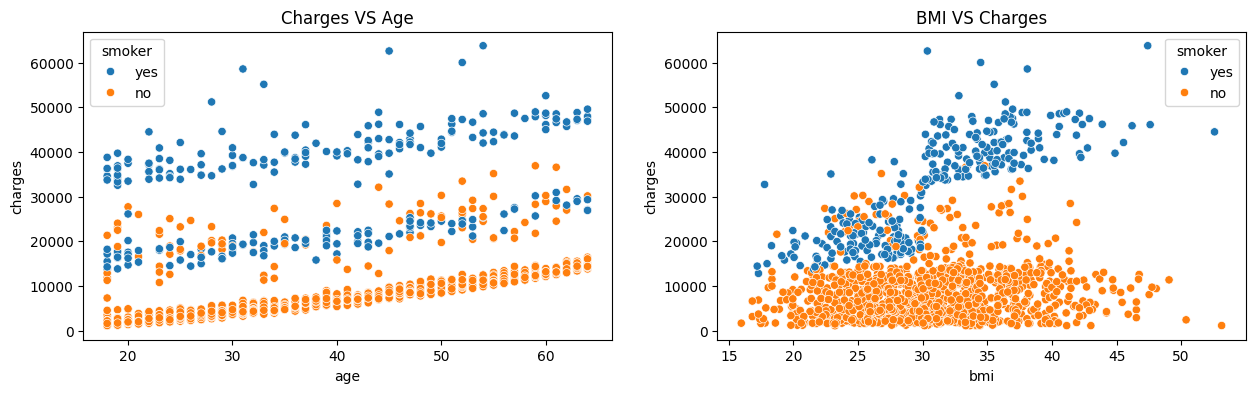

In [69]:
figure,axs =plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(x="age",y="charges",data=df,hue="smoker",ax=axs[0])
axs[0].set_title("Charges VS Age")
sns.scatterplot(x="bmi",y="charges",data=df,hue="smoker",ax=axs[1])
axs[1].set_title("BMI VS Charges")
plt.show()



In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [71]:
#convert data type to numerical one do some encoding
categorical_columns=["sex","smoker","region"]
df_encode=pd.get_dummies(data=df,prefix="OHE",prefix_sep="_",columns=categorical_columns,drop_first="True",dtype="int8")

In [72]:
df_encode

,age,bmi,children,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


ALL OUR DATA IS NUMERIC

In [73]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1337 non-null   int64  
 1   bmi            1337 non-null   float64
 2   children       1337 non-null   int64  
 3   charges        1337 non-null   float64
 4   OHE_male       1337 non-null   int8   
 5   OHE_yes        1337 non-null   int8   
 6   OHE_northwest  1337 non-null   int8   
 7   OHE_southeast  1337 non-null   int8   
 8   OHE_southwest  1337 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 58.8 KB


MACHINE LEARNING PART

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [75]:
#DEFINE FEATURES AND TARGETS
x = df_encode.drop("charges",axis=1)#FEATURES

y = df_encode["charges"]#Target variable


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)#x=features,y=target variable
#splitting data into train and test  set

In [77]:
x_train

,age,bmi,children,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
1212,18,21.470,0,1,0,0,0,0
45,55,37.300,0,1,0,0,0,1
434,31,28.595,1,1,0,1,0,0
994,27,20.045,3,0,1,1,0,0
916,43,26.885,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
31,18,26.315,0,0,0,0,0,0
951,51,42.900,2,1,1,0,1,0
1065,42,25.300,1,0,0,0,0,1
743,31,26.620,0,0,0,0,1,0


In [78]:
x_test

,age,bmi,children,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
634,51,39.700,1,1,0,0,0,1
1198,40,29.355,1,1,0,1,0,0
207,35,27.740,2,1,1,0,0,0
714,24,22.600,0,0,0,0,0,1
616,56,28.595,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
298,31,34.390,3,1,1,1,0,0
369,18,30.400,3,1,0,0,0,0
153,42,23.370,0,0,1,0,0,0
264,53,38.060,3,0,0,0,1,0


In [79]:
y_train

1212     1702.45530
45      20630.28351
434      4243.59005
994     16420.49455
916     21774.32215
           ...     
31       2198.18985
951     47462.89400
1065     7045.49900
743      3757.84480
596      7640.30920
Name: charges, Length: 1069, dtype: float64

In [80]:
y_test

634      9391.34600
1198     6393.60345
207     20984.09360
714      2457.50200
616     11658.11505
           ...     
298     38746.35510
369      3481.86800
153     19964.74630
264     20462.99766
359      1607.51010
Name: charges, Length: 268, dtype: float64

In [81]:
x_train.shape

(1069, 8)

In [82]:
x_test.shape

(268, 8)

CREATE THE MODEL
FIT THE MODEL

In [83]:
#create model
model =LinearRegression()
#fit model to training data
model.fit(x_train,y_train)
#make predictions for the test set
y_pred=model.predict(x_test)

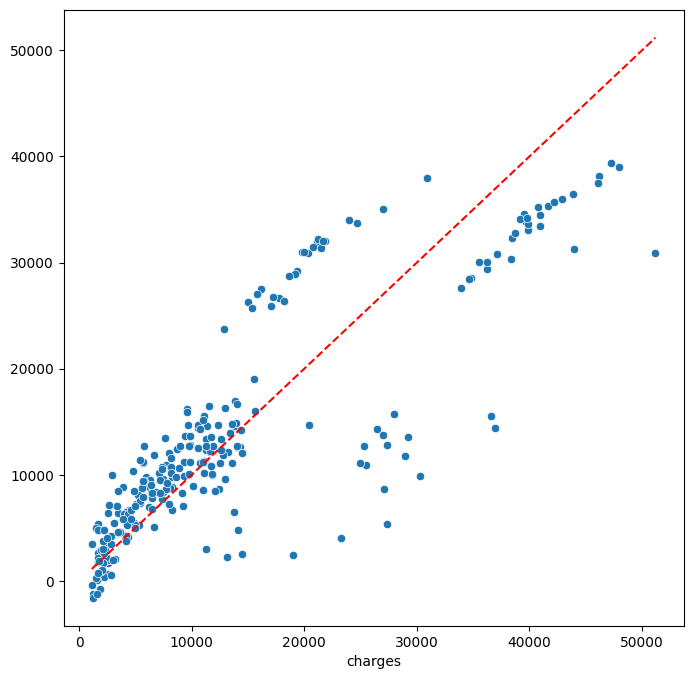

In [84]:
#vizualize model
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],"--", color="red")

In [85]:
df_encode.columns

Index(['age', 'bmi', 'children', 'charges', 'OHE_male', 'OHE_yes',
       'OHE_northwest', 'OHE_southeast', 'OHE_southwest'],
      dtype='object')

In [86]:
#use model for making new predictions
new_data=pd.DataFrame({"age":[25],"bmi":[20],"children":[3],'OHE_male':[1], 'OHE_yes':[0],
       'OHE_northwest':[1], 'OHE_southeast':[0], 'OHE_southwest':[0]})


In [87]:
 prediction = model.predict(new_data)
 print(f"The predicted charges for this new person:{prediction[0]}")

The predicted charges for this new person:2262.3736777706


In [88]:
# calculate the mean absolute error
accuracy= mean_absolute_error(y_test, y_pred)
print(f"model accuracy is {accuracy}")

model accuracy is 4476.75278222733


In [89]:
# get the intercept and coefficients of the model
intercept = model.intercept_
coefficients = model.coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 8
[  248.33555602   344.63120843   429.91053863   -55.41124918
 24099.58462062]


In [90]:
model_intercept= model.intercept_
model_coefficient= model.coef_[0]
print(f"model coefficient is: {model_coefficient}")
print(f"model intercept is: {model_intercept}")

model coefficient is: 248.33555601605497
model intercept is: -11591.16138633691


In [91]:
# get the features
feature_names = model.feature_names_in_
print("features len:", len(feature_names))
print(feature_names)      # print first five feature names

features len: 8
['age' 'bmi' 'children' 'OHE_male' 'OHE_yes' 'OHE_northwest'
 'OHE_southeast' 'OHE_southwest']


GENERALISIBILITY

In [94]:
#use the model to create new prediction
new_data=pd.DataFrame({"age":[25],"bmi":[20],"children":[3],'OHE_male':[1], 'OHE_yes':[0],
       'OHE_northwest':[1], 'OHE_southeast':[0], 'OHE_southwest':[0]})
#use the model to create new prediction
new_data=pd.DataFrame({"age":[25],"bmi":[20],"children":[3],'OHE_male':[1], 'OHE_yes':[0],
       'OHE_northwest':[1], 'OHE_southeast':[0], 'OHE_southwest':[0]})
prediction = model.predict(new_data)
print(f"The predicted charges for this new person is : {prediction[0]}")
print(f"The predicted charges for this new person is : {prediction[0]}")

The predicted charges for this new person is : 2262.3736777706
The predicted charges for this new person is : 2262.3736777706


In [95]:
new_data2 = pd.DataFrame({"age":[35], "bmi": [37], "children":[5],"OHE-male": [0],'OHE-yes':[1],
 'OHE-northwest': [0], 'OHE-southeast':[1], 'OHE-southwest': [1]})

prediction = model.predict(new_data)
print(f"The predicted charges for this new person2 is : {prediction[0]}")

The predicted charges for this new person2 is : 2262.3736777706


MODEL EVALUATION

In [96]:
#Calculate the Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 4476.75278222733


In [97]:
#Calculate the Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print(f"The mean squared error is {MSE}")

The mean squared error is 40797942.379731685


In [98]:
#calculate the Root mean squared log error
from sklearn.metrics import mean_squared_log_error
RMSLE = np.log(np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"The Root Mean Squared Log Error is {RMSLE}")

The Root Mean Squared Log Error is 8.76207110311667


In [99]:
#calculate the Root mean squared log error
from sklearn.metrics import mean_squared_log_error
RMSLE = np.log(np.sqrt(MSE))
print(f"The Root Mean Squared Log Error is ", round(RMSLE, 2))


The Root Mean Squared Log Error is  8.76


In [100]:
#calculating the R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"The R-squared is {r2}")

The R-squared is 0.7134874121725818


In [103]:
n = len(df_encode)
k = x.shape[1]
adjusted_r_squared = 1 - ((1-r2) * (n - 1)/(n -k - 1))
print(f" The adjusted r squared is {adjusted_r_squared}")

 The adjusted r squared is 0.7117614327278383
